In [50]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

### Read the prediction .csv file

In [46]:
csv_path = Path(r'C:\Users\DeSchaetzen\Desktop\RODI\MachineLearningClassifier\logs\rodi\rodi_resnet18_cross-entropy_b128_Kfold4_Dip\predictions\rodi_resnet18_cross-entropy_b128_aug-02.csv')
df = pd.read_csv(csv_path)
classes = pd.unique(df.y_true)
print(classes)

['Baetidae' 'Capniidae' 'Diptera' 'Heptageniidae' 'Perlodidae'
 'Rhyacophilidae' 'Salmonidae']


### Reduce the predictions based on drift events

In [48]:
UN_ID = pd.unique(df.ind_id)
df_r = pd.DataFrame()
for i in UN_ID:
    df_id = df[df.ind_id == i]
    y_true = df_id.y_true.mode()
    y_pred = df_id.y_pred.mode()
    data = [(y_true[0],y_pred[0],i)]
    df_id_r = pd.DataFrame(data, columns = ['y_true','y_pred','ind_id'])
    df_r = pd.concat([df_r, df_id_r], sort = False)
print(df_r)   
df_r.to_csv(r'C:\Users\DeSchaetzen\Desktop\RODI\MachineLearningClassifier\logs\rodi\rodi_resnet18_cross-entropy_b128_Kfold4_Dip\predictions\rodi_resnet18_cross-entropy_b128_aug-02_reduced.csv')

      y_true      y_pred ind_id
0   Baetidae    Baetidae    ID1
0   Baetidae    Baetidae    ID2
0   Baetidae    Baetidae    ID3
0   Baetidae    Baetidae    ID4
0   Baetidae  Perlodidae    ID5
..       ...         ...    ...
0    Diptera     Diptera  ID281
0    Diptera     Diptera  ID282
0    Diptera     Diptera  ID283
0    Diptera     Diptera  ID284
0    Diptera     Diptera  ID285

[285 rows x 3 columns]


### Definitions for the classification report and confusion matrix

In [51]:
def classification_reportX(*args, figsize=None, **kwargs):
    """Extends classification report by adding an useful plot for the performance across classes"""
    r = classification_report(*args, **kwargs, output_dict=True)
    rdf0 = pd.DataFrame(r)
    rdf = rdf0.T.iloc[:-3,:].sort_values('support',ascending=False)
    fig, ax1 = plt.subplots(figsize=figsize)
    ax2 = ax1.twinx()

    xbar = range(len(rdf))
    ax1.bar(xbar,rdf['support'], alpha=0.2)
    ax2.plot(rdf['f1-score'], 'ro', label='f1-score')
    ax2.plot(rdf['precision'], 'g*', label='precision', alpha=0.5)
    ax2.plot(rdf['recall'], 'b*', label='recall', alpha=0.5)

    ax2.vlines(xbar, rdf['f1-score'], rdf['precision'], 'g')
    ax2.vlines(xbar, rdf['f1-score'], rdf['recall'], 'b')

    ax2.hlines(rdf0['weighted avg']['f1-score'], 0,len(rdf), color='r', linestyle='--', label='weighted f1-score')
    ax2.hlines(rdf0['macro avg']['f1-score'], 0,len(rdf), color='r', linestyle='-.', label='macro f1-score')
    ax2.hlines(rdf0['accuracy']['recall'], 0,len(rdf), color='b', linestyle='--', label='accuracy')

    fig.legend()
    return classification_report(*args, **kwargs)

def confusion_matrixX(y_true, y_pred, classes, figsize=(15,15)):
    cm = confusion_matrix(y_true, y_pred, normalize= None)
    fig, ax = plt.subplots(figsize=figsize)

    mask = np.zeros_like(cm)
    mask[cm==0] = 1
    sns.heatmap(cm, 
                annot=True, 
                fmt='.0f', 
                cmap="YlGnBu",
                xticklabels=classes, 
                yticklabels=classes,
                mask=mask,
                square=True, 
                cbar=False,
                ax=ax)
    ax.set_ylabel('True label', size=18)
    ax.set_xlabel('Predicted label', size=18)

### Classification report for predictions on all image

                precision    recall  f1-score   support

      Baetidae       0.93      0.86      0.90      1300
     Capniidae       0.86      0.89      0.87       731
       Diptera       0.91      0.97      0.94       388
 Heptageniidae       0.92      0.92      0.92      1294
    Perlodidae       0.71      0.79      0.75       238
Rhyacophilidae       0.95      0.96      0.96       518
    Salmonidae       0.81      0.96      0.88       129

      accuracy                           0.90      4598
     macro avg       0.87      0.91      0.89      4598
  weighted avg       0.90      0.90      0.90      4598



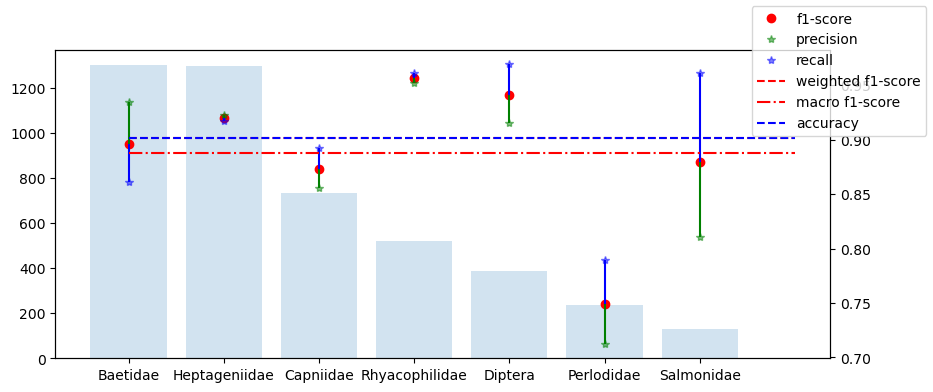

In [52]:
print(classification_reportX(df.y_true, df.y_pred, figsize=(10,4)))

### Confusion matrix for the predictions on all images

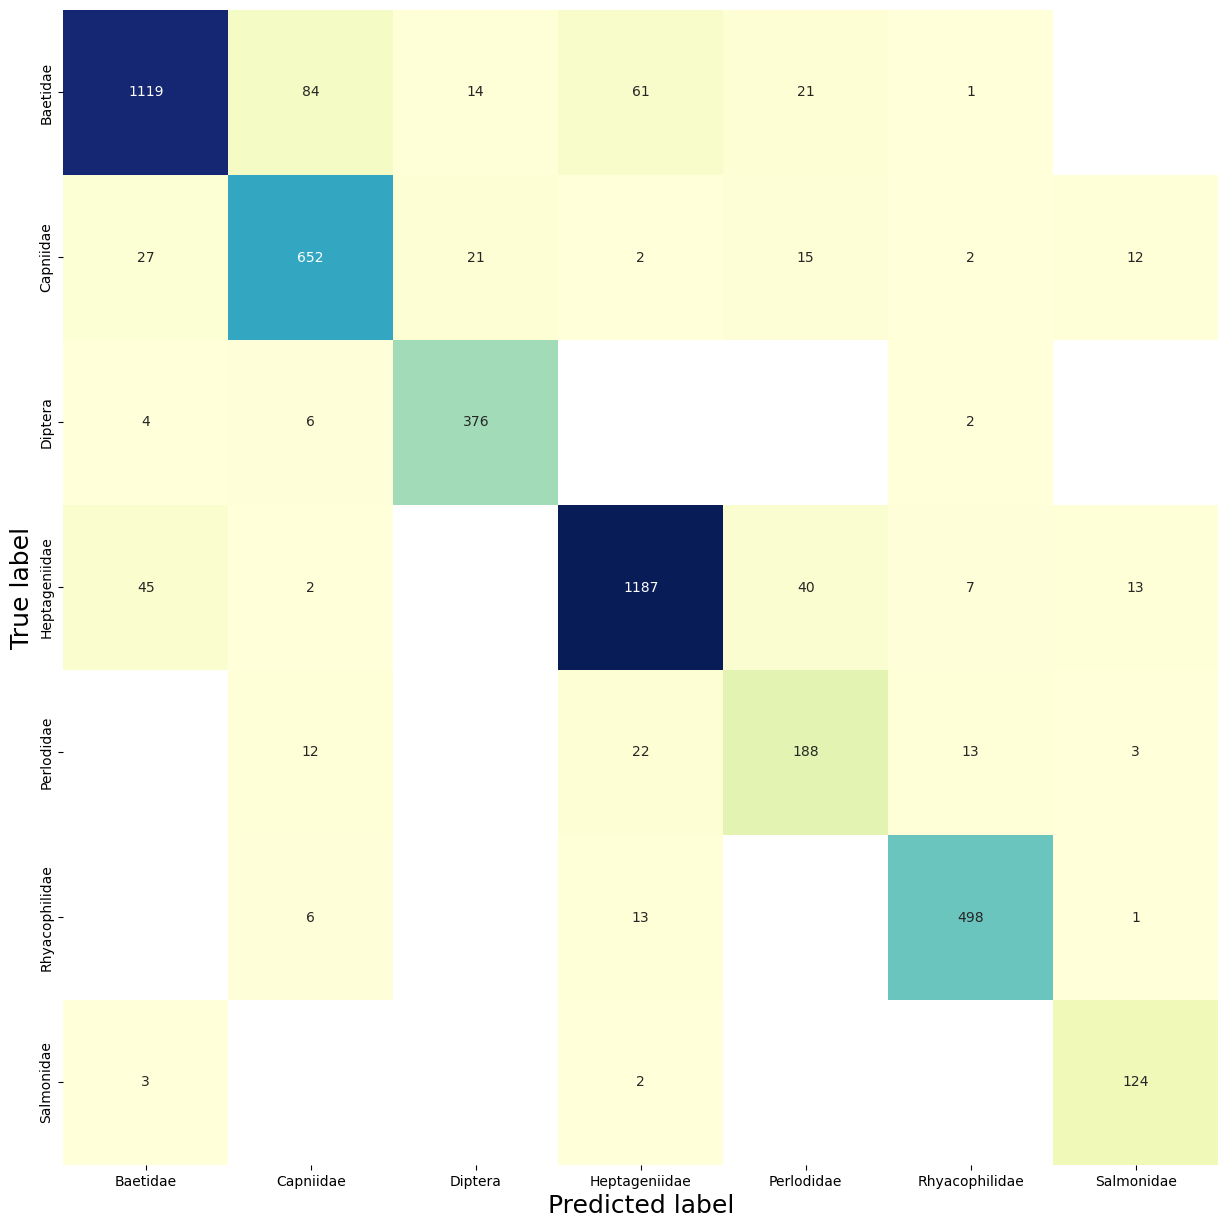

In [53]:
confusion_matrixX(df.y_true, df.y_pred, classes)

### Classification report for the predictions reduced to drift events

                precision    recall  f1-score   support

      Baetidae       0.98      0.91      0.94        87
     Capniidae       0.87      0.93      0.90        42
       Diptera       0.95      0.98      0.96        41
 Heptageniidae       0.96      0.97      0.96        70
    Perlodidae       0.73      0.73      0.73        11
Rhyacophilidae       0.95      1.00      0.97        18
    Salmonidae       1.00      1.00      1.00        16

      accuracy                           0.94       285
     macro avg       0.92      0.93      0.92       285
  weighted avg       0.94      0.94      0.94       285



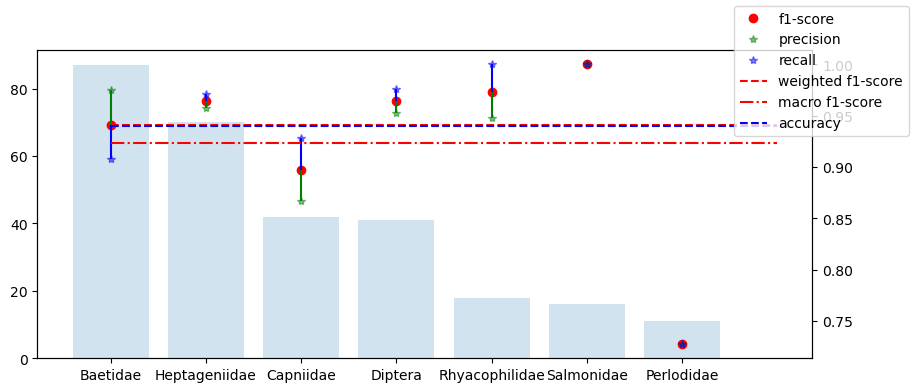

In [54]:
print(classification_reportX(df_r.y_true, df_r.y_pred, figsize=(10,4)))

### Confusion matrix for the predictions reduced to drift events

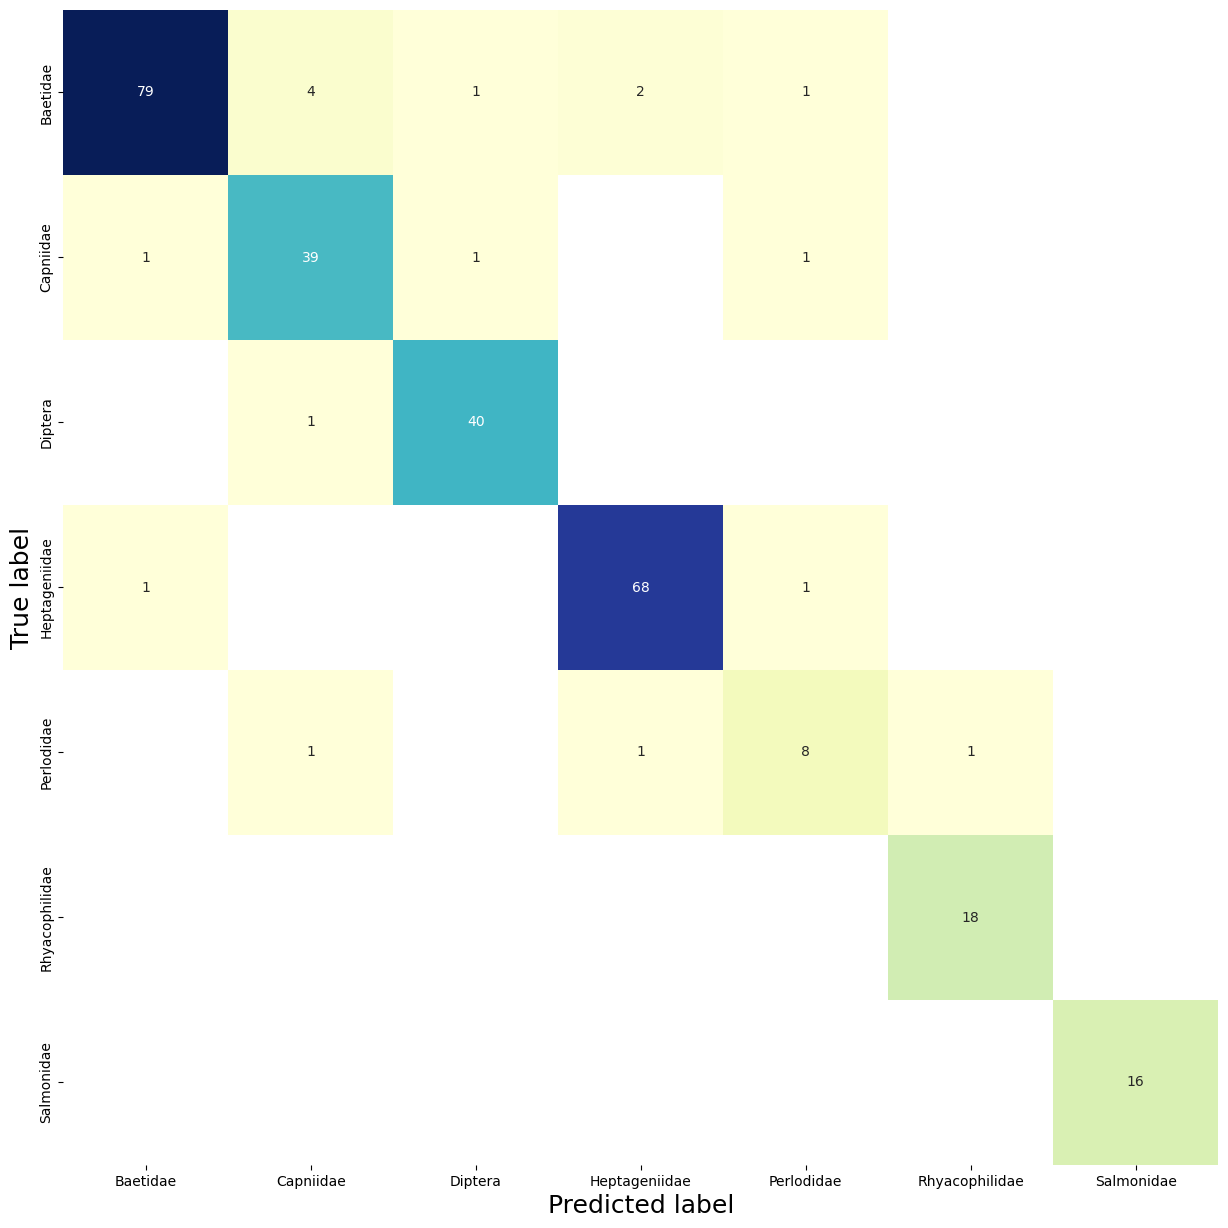

In [41]:
confusion_matrixX(df_r.y_true, df_r.y_pred, classes)